<a href="https://colab.research.google.com/github/tphlabs/python_workshop/blob/main/plotting/c/Cpractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab 2 Graph workshop. Capacitor experiment

2024 Evgeny Kolonsky

Here are student's code and result plotted

<ipython-input-3-59feb70fcfcf>:40: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  ln_v_c = scipy.log(v6)


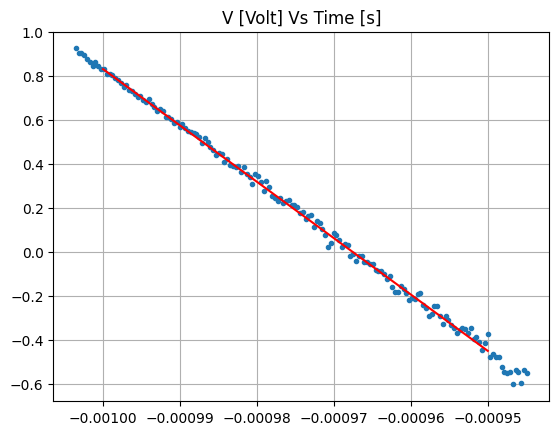

In [3]:
import numpy as np # math functions
import scipy # scientific functions
import matplotlib.pyplot as plt # for plotting figures and setting their properties
import pandas as pd # handling data structures (loaded from files)
from scipy.stats import linregress # contains linregress (for linear regression)
from scipy.optimize import curve_fit as cfit # non-linear curve fitting
from sklearn.metrics import r2_score # import function that calculates R^2 score
from scipy import stats
#%% capacity
R1 = 74.8*10**3 #ohm
R2 = 0.984*10**3#ohm
A = 0.0531#m^2
d = 0.001#m
epsy_0 = 8.8541878*10**-12#F/m
C_max = (A*epsy_0)/d

#%% section 5
filename = 'https://raw.githubusercontent.com/tphlabs/python_workshop/main/plotting/c/C1.csv'
data_q5 = pd.read_csv(filename,header=1) #For R1=74.8 [Khoms]
v_A = data_q5["1 (VOLT)"]
v_B = data_q5["2 (VOLT)"]
#q5_ו
i_5 = (data_q5["2 (VOLT)"]/R2)#Amper
v_c_5 = np.array(v_A-v_B)#Volt
v_c5 = v_c_5[0:2500]
t_q5 = np.array(data_q5["Time (s)"])
#q5_ז
q_capacitor = scipy.integrate.cumtrapz(y=i_5,x=t_q5, initial=0)
q_5 = q_capacitor[0:2500]
reg1=scipy.stats.linregress(v_c5,q_5)
slp1=reg1.slope
intrspt1=reg1.intercept
r_sqr=(reg1.rvalue)**2



#%% section 6
t6 = t_q5[2020:2182]
v6 = v_c_5[2020:2182]
ln_v_c = scipy.log(v6)
fig2 = plt.figure()
plt.plot(t6,ln_v_c,'.',label='Ln')
plt.title('V [Volt] Vs Time [s]')
plt.grid()

reg2=scipy.stats.linregress(t6,ln_v_c)
slp2=reg2.slope
intrsp2=reg2.intercept
r_sqr2=(reg2.rvalue)**2

x_reg2=np.linspace(-0.001,-0.00095,100)
y_reg2=slp2*x_reg2+intrsp2
plt.plot(x_reg2,y_reg2,'red',label='Regression')

Here is improved graph

In [4]:
from scipy.optimize import curve_fit


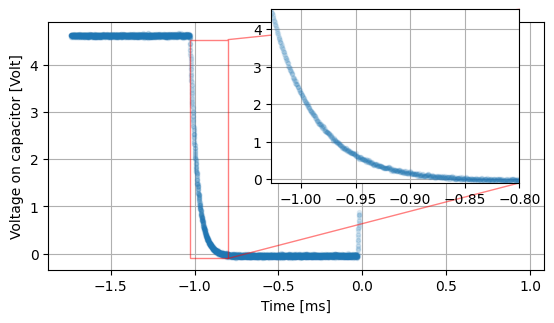

In [5]:
t = t_q5
v = v_c_5
vmax = np.max(v) * 0.97
vmin = -0.1
tmin = np.min(t[ v < vmax ])
tmax = -0.80e-3


# set up main fig/axes
fig, ax = plt.subplots();
ax.set_box_aspect(.5)
inset_ax = ax.inset_axes(
    [0.45,0.35, 0.5, 0.7],  # [x, y, width, height] w.r.t. axes
    xlim=[tmin*1e3, tmax*1e3], ylim=[vmin, vmax])


ax.indicate_inset_zoom(inset_ax, edgecolor="red");
#voffset = np.mean(v[t > tmax])
ax.plot(t*1e3, v, '.', alpha=0.1)
ax.set_xlabel('Time [ms]')
ax.set_ylabel('Voltage on capacitor [Volt]')
ax.grid()

inset_ax.plot(t*1e3, v, '.', alpha=0.1)
inset_ax.grid()
fig.savefig('Cdischarge.png')

In [6]:
filter = (t > tmin) *  (t < tmax)
t1 = t[filter]
t1 += - np.min(t1)
v1 = v[filter]
#v1 -= voffset
vu = v1 /  v1[0] # unitless

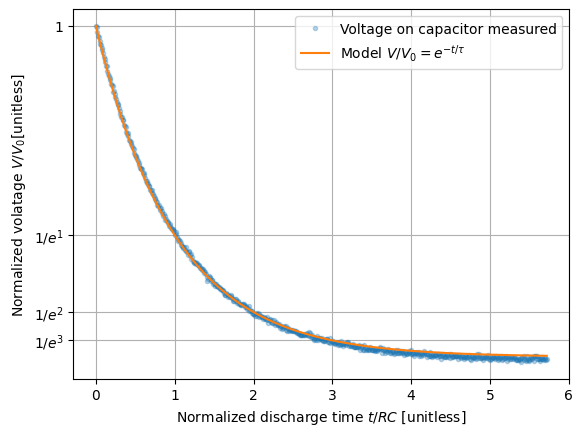

In [21]:
def func(t, tau):
    return np.exp(-t / tau)
fig, ax = plt.subplots();
popt, pcov = curve_fit(func, t1, vu)
tau = popt[0]
tau_err = np.sqrt(np.diag(pcov))[0]

plt.plot(t1 / tau, vu, '.', alpha=0.3,
         label='Voltage on capacitor measured')
plt.plot(t1 / tau, func(t1, tau),
         label=r'Model $V/V_0 = e^{-t/\tau}$' )

plt.xlabel('Normalized discharge time $t/RC$ [unitless]')
plt.ylabel('Normalized volatage $V/V_0$[unitless] ')
#plt.yscale('log')

nticks= 4
ticks = [np.exp(-i) for i in range(0, nticks)]
labels =  [1] +  [rf'$1/e^{i}$' for i in range(1, nticks)]
ax = plt.gca()
ax.set_yticks(ticks)
ax.set_yticklabels(labels)

plt.yticks([np.exp(-i) for i in range(0,nticks)])
plt.legend()
plt.grid()
fig.savefig('Cdischargefit.png')